In [19]:
import tensorflow as tf 
import numpy as np 

In [20]:
np.random.seed(42)
X = np.random.rand(100, 10)  # 100 10-dimensional observations
# binary label classification for each observation
y = np.random.randint(0, 2, size=100)

In [21]:
class MyThresholdCallback(tf.keras.callbacks.Callback):
    def __init__(self, threshold):
        super(MyThresholdCallback, self).__init__()
        self.threshold = threshold

    def on_epoch_end(self, epoch, logs=None):
        loss = logs["loss"]
        if loss <= self.threshold:
            self.model.stop_training = True


In [9]:
my_callback = MyThresholdCallback(threshold=0.005)


units_per_layer = 500
layers = 2
print(f"Number of units per layer: {units_per_layer}")
print(f"Number of layers: {layers}")


model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units = units_per_layer, activation = 'relu', input_shape = (10,)))
for _ in range(layers - 1):
    model.add(tf.keras.layers.Dense(units = units_per_layer, activation = 'relu'))

model.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

# Grab the random initialization of the weights:
initial_weights_ml = []
for i in range(layers):
    initial_weights_ml.append(model.layers[i].get_weights()[0])

# Compile and fit the model:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
history = model.fit(X, y, epochs=5000, batch_size=1, callbacks=[my_callback], verbose=0)

# Grab the final position of the weights:
final_weights_ml = []
for i in range(layers):
    final_weights_ml.append(model.layers[i].get_weights()[0])

# Find the difference for each layer:
diff_weights_ml = []
for i in range(layers):
    diff_weights_ml.append(np.linalg.norm(initial_weights_ml[i]-final_weights_ml[i])) 

Number of units per layer: 500
Number of layers: 2


In [22]:
import tensorflow as tf
import numpy as np

# Generate synthetic dataset
np.random.seed(42)
X = np.random.rand(100, 10) # 100 datapoints of 10 features each
y = np.random.randint(0, 2, size = 100) # binary classification labels

# Initialize arrays for storing weights
initial_weights = []
final_weights = []
diff_weights = []

# Define the range of units in the first layer
unit_range = np.arange(200, 1205, 200)

for units in unit_range:
    # Define the model architecture
    print(f"Number of units: {units}")
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(units=units, activation='relu', input_shape=(10,)),
        tf.keras.layers.Dense(units=1, activation='sigmoid')
    ])

    # Print initial weights
    initial_weights.append(model.layers[0].get_weights()[0])

    # Compile the model with a loss function and an optimizer
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train the model using lazy training
    model.fit(X, y, epochs=1000, batch_size=1, callbacks = [my_callback], verbose=0)

    # Print final weights and calculate difference
    final_weights.append(model.layers[0].get_weights()[0])
    diff_weights.append(final_weights[-1] - initial_weights[-1])


Number of units: 200
Number of units: 400
Number of units: 600
Number of units: 800
Number of units: 1000
Number of units: 1200


In [23]:
diff_avg = []
for i in range(len(unit_range)):
    diff_weights_flat = np.ndarray.flatten(diff_weights[i])
    diff_weights_flat = np.abs(diff_weights_flat)
    diff_avg.append(np.average(diff_weights_flat))

In [27]:
import tensorflow as tf
import numpy as np

# Generate synthetic dataset
np.random.seed(42)
X = np.random.rand(100, 10) # 100 datapoints of 10 features each
y = np.random.randint(0, 2, size = 100) # binary classification labels

# Initialize arrays for storing weights
initial_weights_ml_1 = []
final_weights_ml_1 = []
initial_weights_ml_2 = []
final_weights_ml_2 = []
diff_weights_ml_1 = []
diff_weights_ml_2 = []

# Define the range of units in the first layer
unit_range = np.arange(200, 1205, 200)

for units in unit_range:
    # Define the model architecture
    print(f"Number of units per layer: {int(units / 2)}")
    print(f"Number of layers: 2")
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(units=units / 2, activation='relu', input_shape=(10,)),
        tf.keras.layers.Dense(units = units / 2, activation = 'relu'),
        tf.keras.layers.Dense(units=1, activation='sigmoid')
    ])

    # Print initial weights
    initial_weights_ml_1.append(model.layers[0].get_weights()[0])
    initial_weights_ml_2.append(model.layers[1].get_weights()[0])

    # Compile the model with a loss function and an optimizer
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train the model using lazy training
    model.fit(X, y, epochs=1000, batch_size=1, callbacks = [my_callback], verbose=0)

    # Print final weights and calculate difference
    final_weights_ml_1.append(model.layers[0].get_weights()[0])
    final_weights_ml_2.append(model.layers[1].get_weights()[0])

    diff_weights_ml_1.append(final_weights_ml_1[-1] - initial_weights_ml_1[-1])
    diff_weights_ml_2.append(final_weights_ml_2[-1] - initial_weights_ml_2[-1])


Number of units per layer: 100
Number of layers: 2
Number of units per layer: 200
Number of layers: 2
Number of units per layer: 300
Number of layers: 2
Number of units per layer: 400
Number of layers: 2
Number of units per layer: 500
Number of layers: 2
Number of units per layer: 600
Number of layers: 2


In [35]:
diff_avg_ml_1 = []
diff_avg_ml_2 = []

for i in range(len(unit_range)):
    diff_weights_flat_ml_1 = np.ndarray.flatten(diff_weights_ml_1[i])
    diff_weights_flat_ml_1 = np.abs(diff_weights_flat_ml_1)
    diff_avg_ml_1.append(np.average(diff_weights_flat_ml_1))

for i in range(len(unit_range)):
    diff_weights_flat_ml_2 = np.ndarray.flatten(diff_weights_ml_2[i])
    diff_weights_flat_ml_2 = np.abs(diff_weights_flat_ml_2)
    diff_avg_ml_2.append(np.average(diff_weights_flat_ml_2))

diff_avg_ml_sum = []
for i in range(len(unit_range)):
    diff_avg_ml_sum.append(diff_avg_ml_1[i] + diff_avg_ml_2[i])

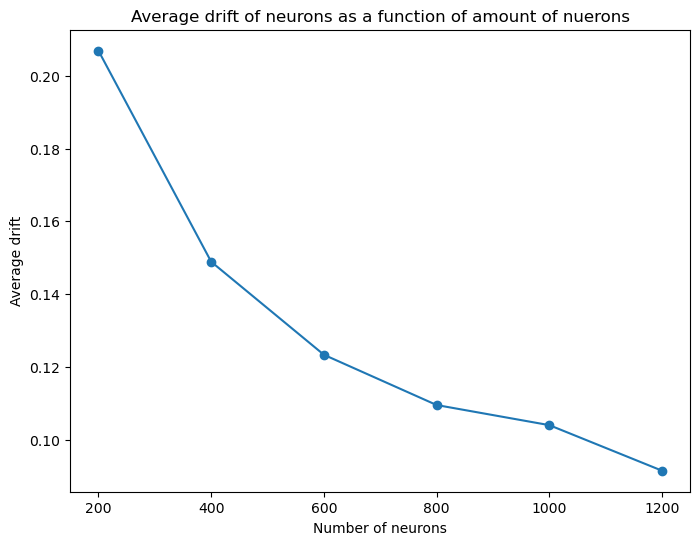

In [24]:
import matplotlib.pyplot as plt

# set the size of the figure
fig, ax = plt.subplots(figsize = (8, 6))

# create the plot
ax.plot(unit_range, diff_avg, linestyle = '-', marker = 'o')

# set the title and axis labels
ax.set_title('Average drift of neurons as a function of amount of nuerons')
ax.set_xlabel('Number of neurons')
ax.set_ylabel('Average drift')


# display the plot
plt.show()

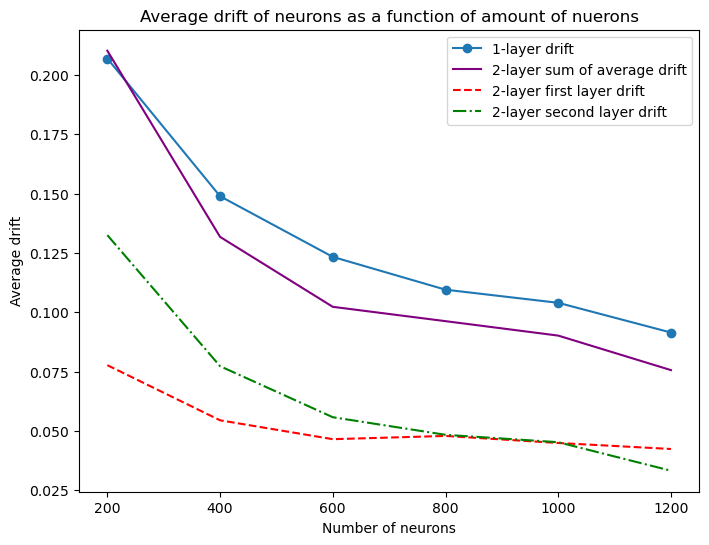

In [40]:
import matplotlib.pyplot as plt

# set the size of the figure
fig, ax = plt.subplots(figsize = (8, 6))

# create the plot
line1, = ax.plot(unit_range, diff_avg, linestyle = '-', marker = 'o', label = '1-layer drift')
line2, = ax.plot(unit_range, diff_avg_ml_sum, linestyle = '-', color = 'purple', label = '2-layer sum of average drift')
line3, = ax.plot(unit_range, diff_avg_ml_1, linestyle = '--', color = 'red', label = '2-layer first layer drift')
line4, = ax.plot(unit_range, diff_avg_ml_2, linestyle = '-.', color = 'green', label = '2-layer second layer drift')



# set the title and axis labels
ax.set_title('Average drift of neurons as a function of amount of nuerons')
ax.set_xlabel('Number of neurons')
ax.set_ylabel('Average drift')

ax.legend()


# display the plot
plt.show()